## Importing all required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression
import datetime as datetime
from datetime import date
%matplotlib inline

## 1. Understanding our dataset

In [2]:
#Let's load our dataset from csv into a dataframe
bs_orig = pd.read_csv("day.csv")
bs_orig.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Let's keep our original dataset intact and declare another dataset
bs = bs_orig

In [4]:
bs.shape

(730, 16)

In [5]:
#checking datatypes and looking for missing values
bs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Looking unique values in the features
bs.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [7]:
# Getting to know our dataset through statistical glance
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 # Missing Values


In [8]:
#Checking missing values

bs.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Cleaning our Dataset

In [9]:
bs.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 ###  Dropping Unnecessary Columns


#### From the data dictionary, we can see that some of the columns are not relevant for our analysis.
1. _instant_ varaible can be removed from our analysis as it merely has any info other than index value.

2.  _dteday_ varaible can be removed from our analysis. This variable has date and we already have other columns for year and months.

3. _casual_ and _registered_ varaibles can be removed from our analysis because we are interested in finding total count of the bikes and not in individual categories.

4. _atemp_ variable is the feeling temperature and can be removed because we already have _temp_ variable which defines the true temperature. But let's keep it for now and see if it is highly correlated to _temp_ or not.
5. _holiday_ varaible can be removed from our analysis because _workingday_ together with _weekday_ variable is informative enough.





#### Let's exclude these columns from our analysis from hereon:

In [10]:
bs  = bs[['season', 'yr', 'mnth', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bs.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Let's label the categories as mentioned in data dictionary for better understanding of the variables.

In [11]:
bs.season=bs.season.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bs.mnth= bs.mnth.map({1:"Jan", 2:"Feb", 3:"Mar",4:"Apr",
                   5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
bs.weekday = bs.weekday.map({0: "Sun",1:"Mon", 2:"Tue", 3:"Wed",  4:"Thu", 5:"Fri", 6:"Sat"})
bs.weathersit = bs.weathersit.map({1:"Clear", 2:"Cloudy", 3:"Rain",  4:"HeavyRain"})

In [12]:
bs.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. Data Visualisation

### Let's first visualise numeric variables of our dataset and see the relationship with _cnt_:

## Univariate Analysis

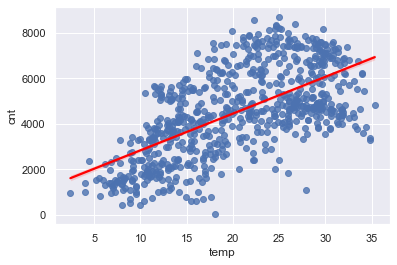

In [13]:
sns.set_theme(style="darkgrid")
sns.regplot(x='temp', y='cnt' , data=bs,ci=68, fit_reg=True, line_kws={"color": "red"})
plt.show()

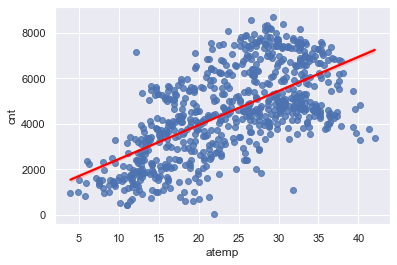

In [14]:
sns.regplot(x='atemp', y='cnt' , data=bs, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.show()

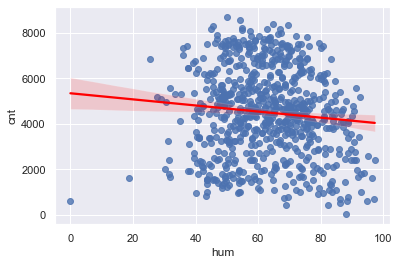

In [15]:
sns.regplot(x='hum', y='cnt' , data=bs, fit_reg=True, line_kws={"color": "red"})
plt.show()

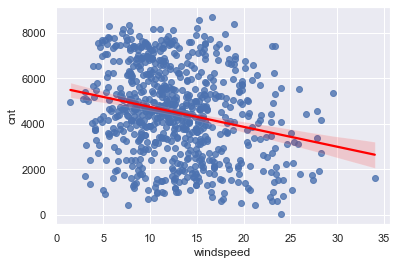

In [16]:
sns.regplot(x='windspeed', y='cnt' , data=bs, fit_reg=True, line_kws={"color": "red"})
plt.show()

## Bivariate Analysis

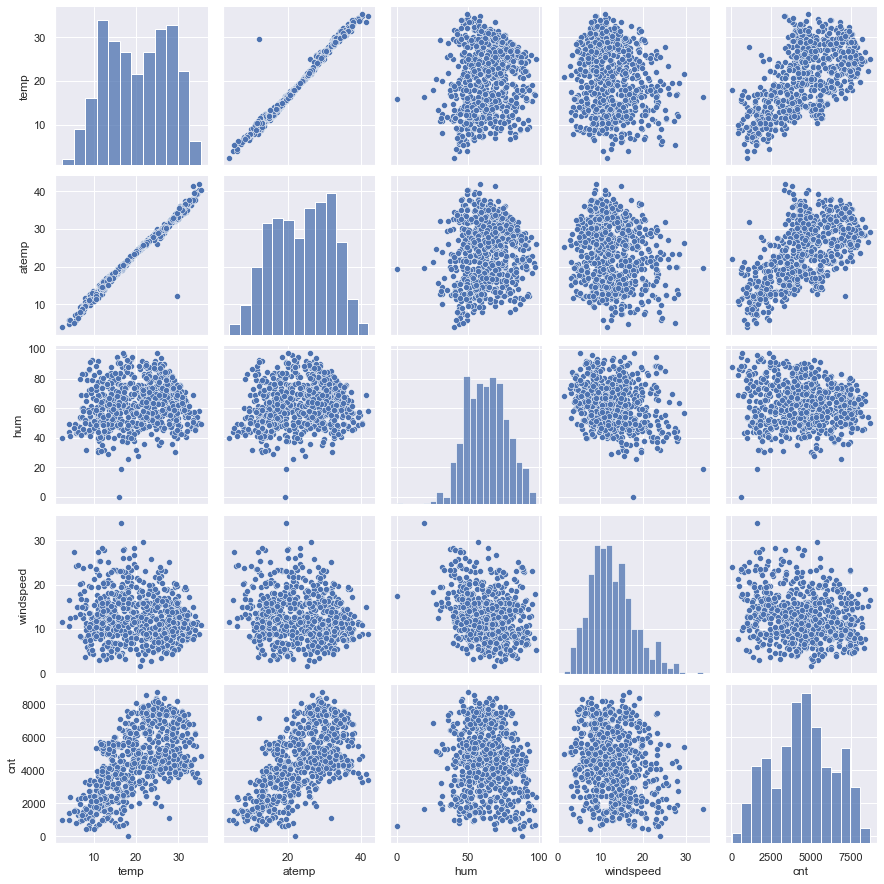

In [17]:
# Let's look at scatter plot among numerical variables:

bs_num=bs[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bs_num, kind='scatter')
plt.show()

BoomBikes are highly correlated to temp and atemp.


### Now let's make boxplots of all our categorical variables against _cnt_:


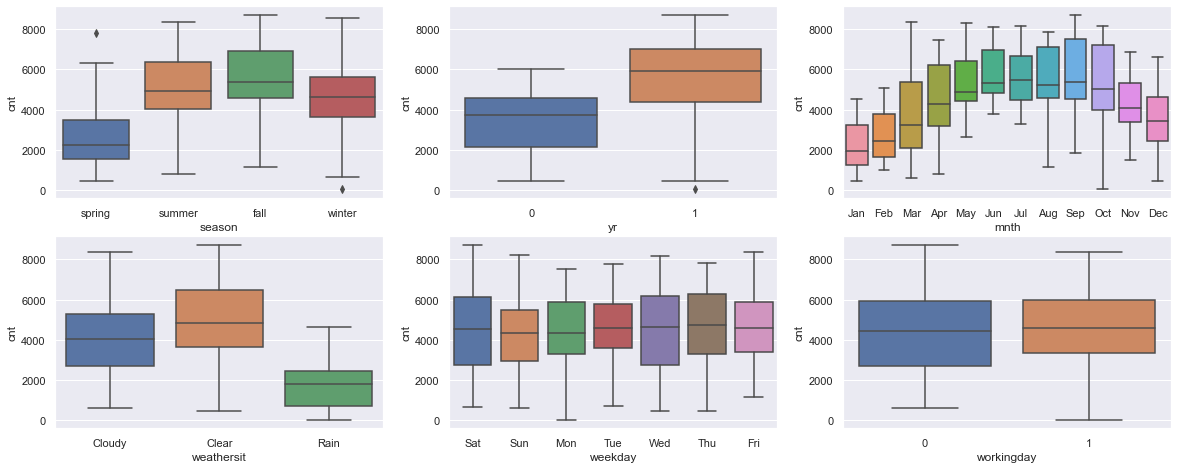

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bs)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs)
plt.show()

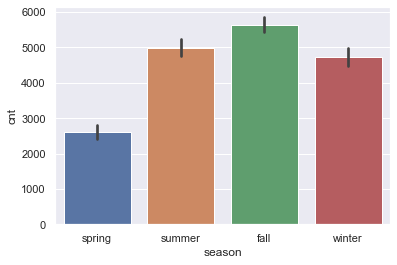

In [19]:
# Relation between season and count of BoomBikes

sns.barplot(x='season',y='cnt',data=bs)
plt.show()

cnt is highest for fall followed by summer

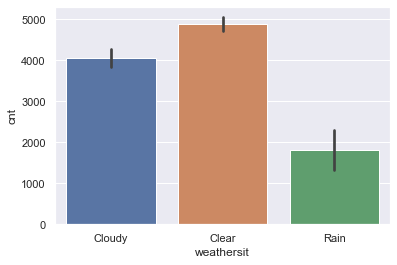

In [20]:
#Relation between weather and count of BoomBikes
sns.barplot(x='weathersit',y='cnt',data=bs)
plt.show()

cnt is highest for Clear weather which seems logical

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

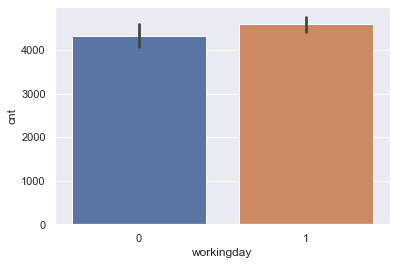

In [21]:
sns.barplot(x='workingday',y='cnt',data=bs)

The difference in cnt with workingday is not that much prominent

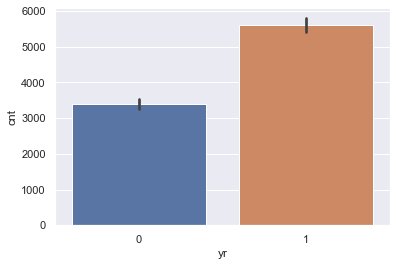

In [22]:
#Relation between Year and count of BoomBikes
sns.barplot(x='yr',y='cnt',data=bs)
plt.show()

Clearly, cnt has significantly increased in 2019

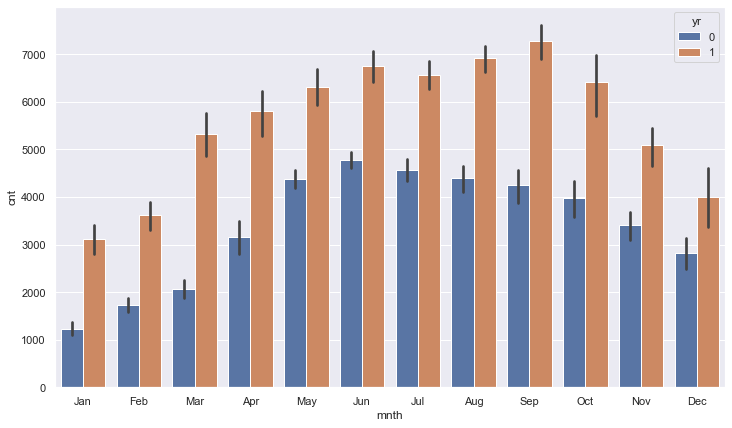

In [23]:
#Relation between month and count of BoomBikes
plt.figure(figsize=(12,7))
sns.barplot(x='mnth',y='cnt',hue='yr',data=bs)
plt.show()

<AxesSubplot:xlabel='weekday'>

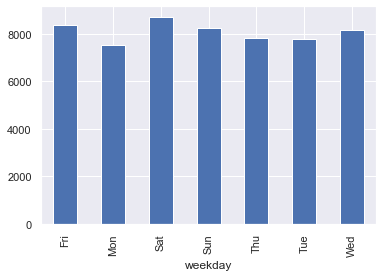

In [24]:
bs.groupby('weekday')['cnt'].max().plot(kind='bar')

# Correlation Matrix


### Let's plot Heatmap to see correlation between variables


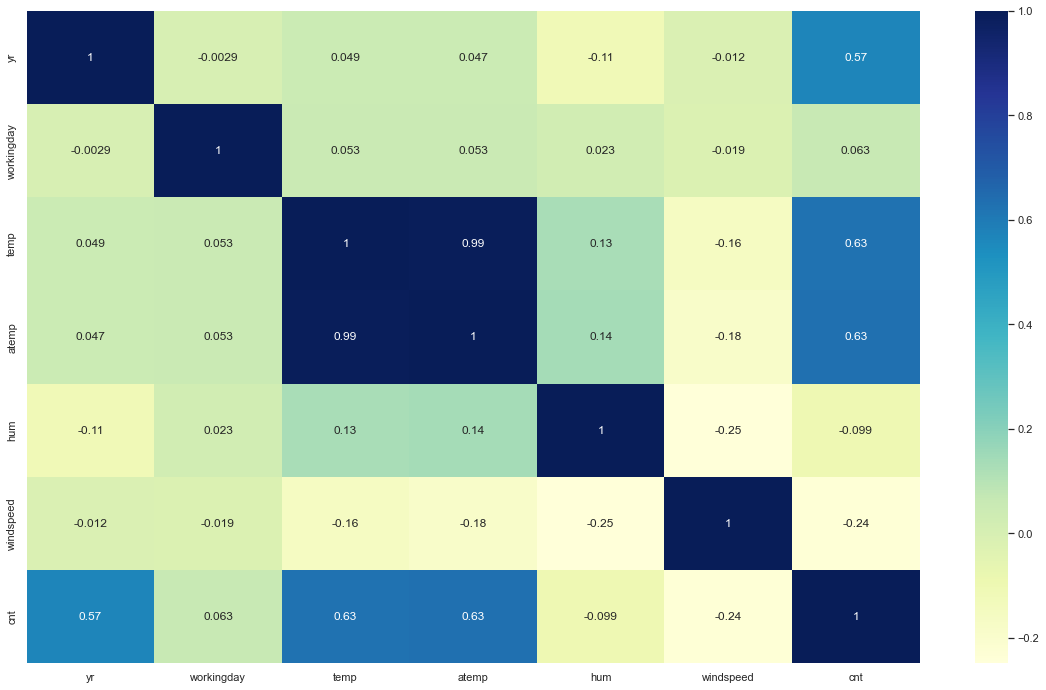

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(bs.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [26]:
# We can see that correlation between temp and atemp is very high i.e. 0.99. We can drop this column from our dataset
bs.drop(['atemp'],axis=1,inplace=True)


### Treating Categorical Variables by creating dummy varaibles
Let's create dummy variables for _mnth_, _weekday_, _season_ and _weathersit_. 
For _yr_ and _workingday_, we have just two unique values, so there is no need to create dummy variables.

In [27]:
bs.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [28]:
bs.shape

(730, 10)

In [29]:
bs = pd.get_dummies(bs, drop_first=True)

In [30]:
bs.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rain
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
bs.shape

(730, 28)

We now have have a total of 28 columns to begin building our model

## 3. Splitting Dataset into train and test dataset

In [32]:
bs.shape

(730, 28)

In [33]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bs_train, bs_test = train_test_split(bs, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
#Rows and columns after split

print(bs_train.shape)
print(bs_test.shape)

(510, 28)
(219, 28)


## 4. Rescaling Features into normalized scale:
It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

The two most common ways of rescaling are:

1. Min-Max scaling 

2. Standardisation 

Let's go with Min-Max scaling for our model

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()


### Let's apply scaler() on the numeric variables, including our target variable _cnt_:

In [37]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
bs_train[num_vars] = scaler.fit_transform(bs_train[num_vars])

In [38]:
#Let's look at the numeric values now
bs_train.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rain
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
bs_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Building our Linear Regression Model

Let's divide our dataset into X and y sets for building model

In [40]:
y_train = bs_train.pop('cnt')
X_train = bs_train

### Now we will use RFE( Recursive Feature Elimination ) to eliminate features which are not statistically relevant for our model

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)   #Let's keep 15 features         
rfe = rfe.fit(X_train, y_train)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Rain', True, 1)]

In [44]:
col = X_train.columns[rfe.support_]


In [45]:
#Let's look at the variables which are not supported by rfe 
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed'],
      dtype='object')

In [46]:
# Now let's build our model with just RFE supported variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_Cloudy,weathersit_Rain
653,1,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1,0


## Model 1

### Let's define functions to build models and calculate VIF.

In [47]:
#Function for Model Building
def MLR(X,y):
    X_train = sm.add_constant(X)
    lr = sm.OLS(y, X_train)
    lr_model = lr.fit()
    lr_model.params
    return lr_model



In [48]:
#Function to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]                                      
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by= "VIF", ascending =False)
    return vif

In [49]:
lr1 = MLR(X_train_rfe,y_train)


In [50]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        16:57:56   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1925      0.042      4.537      0.000       0.109       0.276
yr                    0.2305      0.008     28.807      0.000       0.215       0.246
workingday            0.1021      0.025      4.035      0.000       0.052       0.152
temp                  0.5098      0.034     14.851      0.000       0.442       0.577
hum                  -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed            -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring        -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer         0.0497      0.015      3.346      0.001       0.020       0.079
season_winter         0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan             -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul             -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep              0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat           0.1123      0.027      4.200      0.000       0.060       0.165
weekday_Sun           0.0585      0.027      2.178      0.030       0.006       0.111
weathersit_Cloudy    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_Rain      -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif1 = cal_vif(X_train_rfe)
vif1

,Features,VIF
3,hum,32.81
2,temp,19.97
1,workingday,18.57
5,season_spring,5.04
11,weekday_Sat,4.95
4,windspeed,4.92
12,weekday_Sun,4.79
7,season_winter,3.76
6,season_summer,3.03
13,weathersit_Cloudy,2.31


## Model 2

let's drop _mnth_Jan_ due to its high p-value

In [52]:
X_train_new = X_train_rfe.drop(["mnth_Jan"], axis = 1)

In [53]:
lr2 = MLR(X_train_new,y_train)
vif2 = cal_vif(X_train_new)

In [54]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.13e-191
Time:                        16:57:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1799      0.042      4.276      0.000       0.097       0.263
yr                    0.2297      0.008     28.660      0.000       0.214       0.245
workingday            0.1027      0.025      4.047      0.000       0.053       0.152
temp                  0.5278      0.033     15.897      0.000       0.463       0.593
hum                  -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed            -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring        -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer         0.0526      0.015      3.553      0.000       0.024       0.082
season_winter         0.1003      0.017      5.890      0.000       0.067       0.134
mnth_Jul             -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_Sep              0.0818      0.016      4.956      0.000       0.049       0.114
weekday_Sat           0.1126      0.027      4.202      0.000       0.060       0.165
weekday_Sun           0.0594      0.027      2.206      0.028       0.006       0.112
weathersit_Cloudy    -0.0578      0.010     -5.559      0.000      -0.078      -0.037
weathersit_Rain      -0.2463      0.026     -9.449      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif2

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_Sat,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_Sun,4.76
7,season_winter,3.71
6,season_summer,3.03
12,weathersit_Cloudy,2.31


## Model 3

VIF of hum varaible is still very high. Let's drop it and see its effect   

In [56]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [57]:
lr3 = MLR(X_train_new,y_train)
vif3 = cal_vif(X_train_new)

In [58]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.73e-189
Time:                        16:57:56   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1005      0.038      2.618      0.009       0.025       0.176
yr                    0.2336      0.008     28.839      0.000       0.218       0.250
workingday            0.1034      0.026      4.008      0.000       0.053       0.154
temp                  0.4920      0.033     15.056      0.000       0.428       0.556
windspeed            -0.1491      0.025     -6.032      0.000      -0.198      -0.101
season_spring        -0.0653      0.021     -3.139      0.002      -0.106      -0.024
season_summer         0.0465      0.015      3.101      0.002       0.017       0.076
season_winter         0.0859      0.017      5.058      0.000       0.053       0.119
mnth_Jul             -0.0500      0.018     -2.723      0.007      -0.086      -0.014
mnth_Sep              0.0758      0.017      4.532      0.000       0.043       0.109
weekday_Sat           0.1152      0.027      4.225      0.000       0.062       0.169
weekday_Sun           0.0571      0.027      2.085      0.038       0.003       0.111
weathersit_Cloudy    -0.0835      0.009     -9.669      0.000      -0.100      -0.067
weathersit_Rain      -0.2904      0.024    -11.931      0.000      -0.338      -0.243
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif3

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_Sat,4.45
10,weekday_Sun,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_Jul,1.60


## Model 4

VIF of _weekday_Sun_ varaible is very high. Let's drop it and see its effect   

In [60]:
X_train_new = X_train_new.drop(["weekday_Sun"], axis = 1)

In [61]:
lr4 = MLR(X_train_new,y_train)
vif4 = cal_vif(X_train_new)

In [62]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.28e-189
Time:                        16:57:56   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1493      0.031      4.886      0.000       0.089       0.209
yr                    0.2338      0.008     28.766      0.000       0.218       0.250
workingday            0.0547      0.011      4.962      0.000       0.033       0.076
temp                  0.4925      0.033     15.020      0.000       0.428       0.557
windspeed            -0.1500      0.025     -6.047      0.000      -0.199      -0.101
season_spring        -0.0662      0.021     -3.174      0.002      -0.107      -0.025
season_summer         0.0469      0.015      3.117      0.002       0.017       0.076
season_winter         0.0851      0.017      4.997      0.000       0.052       0.119
mnth_Jul             -0.0489      0.018     -2.657      0.008      -0.085      -0.013
mnth_Sep              0.0738      0.017      4.408      0.000       0.041       0.107
weekday_Sat           0.0666      0.014      4.688      0.000       0.039       0.094
weathersit_Cloudy    -0.0830      0.009     -9.581      0.000      -0.100      -0.066
weathersit_Rain      -0.2892      0.024    -11.845      0.000      -0.337      -0.241
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif4

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,yr,2.07
6,season_winter,1.92
9,weekday_Sat,1.83
7,mnth_Jul,1.58
10,weathersit_Cloudy,1.56


## Model 5


Let's drop _mnth_Jul_ and see the results

In [64]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

In [65]:
lr5 = MLR(X_train_new,y_train)
vif5 = cal_vif(X_train_new)

In [66]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          6.86e-189
Time:                        16:57:56   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1405      0.031      4.599      0.000       0.081       0.201
yr                    0.2343      0.008     28.664      0.000       0.218       0.250
workingday            0.0557      0.011      5.021      0.000       0.034       0.077
temp                  0.4800      0.033     14.702      0.000       0.416       0.544
windspeed            -0.1501      0.025     -6.014      0.000      -0.199      -0.101
season_spring        -0.0551      0.021     -2.680      0.008      -0.096      -0.015
season_summer         0.0615      0.014      4.370      0.000       0.034       0.089
season_winter         0.0972      0.017      5.885      0.000       0.065       0.130
mnth_Sep              0.0872      0.016      5.421      0.000       0.056       0.119
weekday_Sat           0.0669      0.014      4.682      0.000       0.039       0.095
weathersit_Cloudy    -0.0817      0.009     -9.391      0.000      -0.099      -0.065
weathersit_Rain      -0.2902      0.025    -11.813      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       76.386   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.041
Skew:                          -0.765   Prob(JB):                     5.41e-42
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif5

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,yr,2.07
5,season_summer,1.99
8,weekday_Sat,1.83
6,season_winter,1.77
9,weathersit_Cloudy,1.56
7,mnth_Sep,1.23


## Model 6

Let's drop _season_spring_ and see the results

In [68]:
X_train_new = X_train_new.drop(["season_spring"], axis = 1)
X_train_lr6 = X_train_new

In [69]:
lr6 = MLR(X_train_new,y_train)
vif6 = cal_vif(X_train_new)

In [70]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.47e-188
Time:                        16:57:56   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0753      0.019      4.051      0.000       0.039       0.112
yr                    0.2331      0.008     28.382      0.000       0.217       0.249
workingday            0.0563      0.011      5.048      0.000       0.034       0.078
temp                  0.5499      0.020     27.885      0.000       0.511       0.589
windspeed            -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_summer         0.0874      0.010      8.481      0.000       0.067       0.108
season_winter         0.1318      0.010     12.760      0.000       0.112       0.152
mnth_Sep              0.0972      0.016      6.181      0.000       0.066       0.128
weekday_Sat           0.0677      0.014      4.710      0.000       0.039       0.096
weathersit_Cloudy    -0.0813      0.009     -9.292      0.000      -0.099      -0.064
weathersit_Rain      -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif6

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
8,weathersit_Cloudy,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_Rain,1.08


In [72]:
lr6.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
season_summer        0.087429
season_winter        0.131826
mnth_Sep             0.097236
weekday_Sat          0.067688
weathersit_Cloudy   -0.081347
weathersit_Rain     -0.288021
dtype: float64

We can see from our analysis that Model 6 has following results
1. It has VIF of predictor variables under permissible limit(<5).
2. It has very low p-values of predictor variables(approx 0).
3. It has a very high F-statistic value i.e. 254(>>1).
4. It has a very low Prob (F-statistic)i.e. 1.47e-188 ~ 0.0000

Based on these results, the model seems to be a good fit.

# Final Model Interpretation

# 6. Hypothesis testing

Hypothesis testing states that:

-  __H0__: B1=B2=...=Bn=0 (Coefficient values are equal to zero)
-  __H1__: at least one Bi!=0 (Atleast one Coefficient value should not be equal to zero)

In [73]:
lr6.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
season_summer        0.087429
season_winter        0.131826
mnth_Sep             0.097236
weekday_Sat          0.067688
weathersit_Cloudy   -0.081347
weathersit_Rain     -0.288021
dtype: float64

Here we can see that all the coefficients of lr6 are not equal to zero which means We can __REJECT the NULL HYPOTHESIS__.

### Let's write equation for our model:
__cnt__  = .075325 + (__yr__ × 0.233056) +(__workingday__ × 0.056323)+(__temp__ × 0.549936)−(__windspeed__ × 0.155238)+(__season_summer__ ×  0.087429)+(__season_winter__ ×  0.131826)+(__mnth_Sep__ × 0.097236) + (__weekday_Sat__ × 0.067688)−(__weathersit_Cloudy__ × 0.081347)−(__weathersit_Rain__ × 0.288021)

Interpretation of Coefficients:

**yr**: A coefficient value of ‘0.233056’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.233056 units.

**workingday**: A coefficient value of ‘0.056323’ indicated that a unit increase in workingday variable, increases the bike hire numbers by 0.056323 units.

**temp**: A coefficient value of ‘0.549936’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.549936 units.


**windspeed**: A coefficient value of ‘0.155238’ indicated that a unit increase in windspeed variable, decreses the bike hire numbers by 0.155238 units.


**season_summer**: A coefficient value of ‘0.087429’ indicated that a unit increase in season_summer variable, increases the bike hire numbers by 0.087429 units.


**season_winter**: A coefficient value of ‘0.131826’ indicated that a unit increase in season_winter variable, increases the bike hire numbers by 0.131826 units.

**mnth_Sep**: A coefficient value of ‘0.097236’ indicated that a unit increase in mnth_Sep variable, increases the bike hire numbers by 0.097236 units.

**weekday_Sat**: A coefficient value of ‘0.067688’ indicated that a unit increase in weekday_Sat variable, increases the bike hire numbers by 0.067688 units.

**weathersit_Cloudy**: A coefficient value of ‘0.081347’ indicated that a unit increase in weathersit_Cloudy variable, decreases the bike hire numbers by 0.081347 units.


**weathersit_Rain**: A coefficient value of ‘0.288021’ indicated that a unit increase in weathersit_Rain variable, decreases the bike hire numbers by 0.288021 units.


__const__: The Constant value of ‘0.075325’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.075325 units.

## VALIDATE ASSUMPTIONS

## 7. Residual Analysis 
Let's validate the assumptions of Linear Regression Model by plotting error terms.

In [74]:
X_train_lr6 = sm.add_constant(X_train_new)

In [75]:
y_train_pred= lr6.predict(X_train_lr6)

<AxesSubplot:title={'center':' Frequency distribution of Residuals'}, ylabel='Density'>

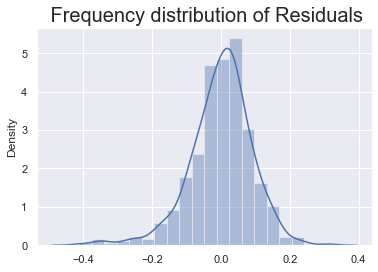

In [76]:
res = y_train-y_train_pred
plt.title(' Frequency distribution of Residuals', fontsize=20)            

sns.distplot(res ,bins = 20)


From the above histogram, we could see Residual errors follow a normal distribution with mean=0


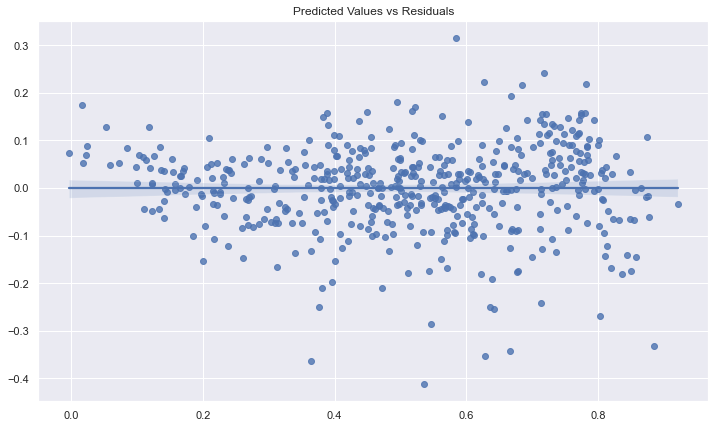

In [77]:
plt.figure(figsize=(12,7))
plt.title('Predicted Values vs Residuals')
sns.regplot(y_train_pred,res)
plt.show()

-  Variance of Errors doesnt follow any trends
-  Residual errors are independent of each other.

## There is No Multicollinearity between the predictor variables

In [78]:
vif6

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
8,weathersit_Cloudy,1.53
5,season_winter,1.40
6,mnth_Sep,1.20
9,weathersit_Rain,1.08


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5.

## 8. Making prediction on Test dataset

__Applying the scaling on the test sets__


In [79]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

bs_test[num_vars] = scaler.transform(bs_test[num_vars])

In [80]:
y_test = bs_test.pop('cnt')
X_test = bs_test

In [81]:
lr6_col=X_train_new.columns

X_test=X_test[lr6_col]


In [82]:
X_test_lr6 = sm.add_constant(X_test)
y_pred = lr6.predict(X_test_lr6)

## 9. EVALUATING OUR MODEL

In [83]:
r2_score(y_test, y_pred)

0.7955844377237249

In [84]:

r2=0.7955844377237249
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7857567664604425

__FINAL RESULTS COMPARISON__:
- Train R^2 :0.836
- Train Adjusted R^2 :0.832
- Test R^2 : 0.796
- Test Adjusted R^2 :0.786

 __The model seems good with above values of R^2__

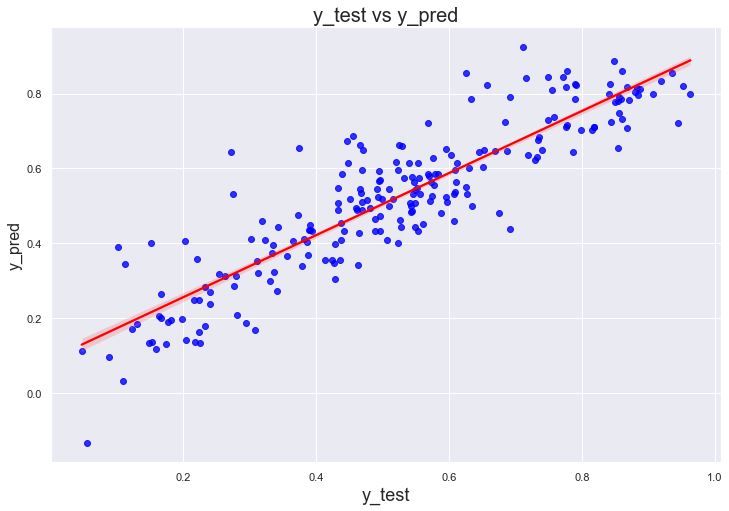

In [85]:
#Regression plot
plt.figure(figsize=(12,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                         
plt.show()

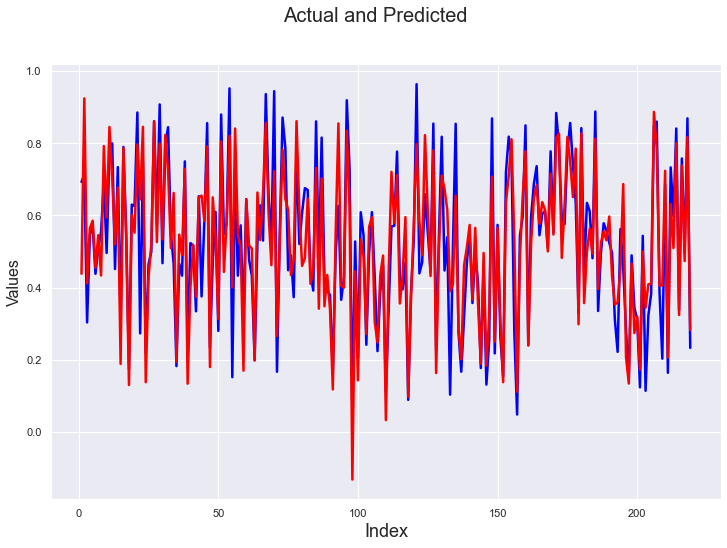

In [86]:
#Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Values', fontsize=16) 
plt.show()

## 10. Comparison between Train model and Test:


- Train - R^2 : 0.833
- Train - Adjusted R^2 : 0.829
- Test - R^2: 0.792
- Test - Adjusted R^2: 0.782

From these findings we can conclude that the model is a good fit.

In [87]:
lr6.params

const                0.075325
yr                   0.233056
workingday           0.056323
temp                 0.549936
windspeed           -0.155238
season_summer        0.087429
season_winter        0.131826
mnth_Sep             0.097236
weekday_Sat          0.067688
weathersit_Cloudy   -0.081347
weathersit_Rain     -0.288021
dtype: float64

# 11. FINAL REPORT

Finally, based on our findings, top 3 predictor variables that influences the bike booking are:
- Temperature (__temp__) - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.
- Weather Situation 3 (__weathersit_Rain__) - A coefficient value of ‘-0.288021’ indicated that, w.r.t weathersit_Rain, a unit increase in weathersit_Rain variable decreases the bike hire numbers by -0.288021 units.
- Year (__yr__) - A coefficient value of ‘0.233056’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.233056 units.
SO THESE VARIABLES NEEDS TO BE GIVEN UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING.
 Next best features are __workingday__, __windspeed__, __season_summer__, __season_winter__, __mnth_Sep__, __weekday_Sat__ and __weathersit_Cloudy__. 